In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import pandas as pd
import train_test_volume
import opnet
from importlib import reload

In [2]:
path = './volume_inversion_net.pth'
dim = 126 # this needs be the size of Lambda_h
num_layers = 10
model = opnet.OperatorNet(dim, num_layers, scalar_output=True)
loss_f = torch.nn.MSELoss()

In [3]:
lr_list = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
losses_list=[]
table2 = pd.DataFrame()

In [4]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test",epochs=10))

In [5]:
epo = np.arange(0,10,2)+2

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

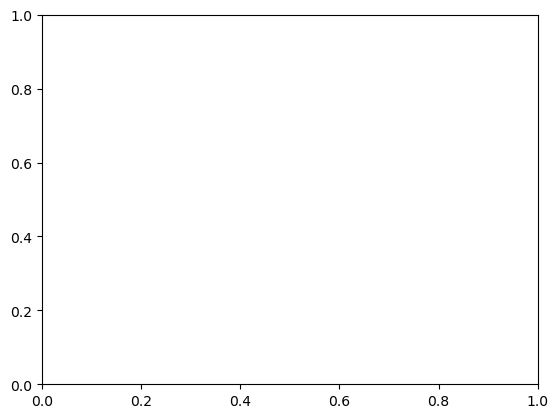

In [6]:
from matplotlib.lines import lineStyles


plt.plot(epo, losses_list[1], label = 'lr=1e-3', linestyle='--')
plt.plot(epo, losses_list[2], label = 'lr=1e-2', linestyle='--')
plt.plot(epo, losses_list[3], label = 'lr=1e-1', linestyle='--')
plt.plot(epo, losses_list[4], label = 'lr=2e-1', linestyle='--')
plt.plot(epo, losses_list[5], label = 'lr=3e-1', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

In [ ]:
index_x = ["2","4","6","8", "10"]
index_y = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
table1 = pd.DataFrame(losses_list, columns=index_x, index = index_y)
table1.index.name = "lr"
table1.to_csv("./results/Table2.csv", index=True)
table1

,2,4,6,8,10
lr,,,,,
0.00001,0.435008,0.433156,0.431332,0.429534,0.427762
0.00100,0.311279,0.221902,0.120698,0.081035,0.059284
0.01000,0.019937,0.013500,0.015087,0.010669,0.008305
0.10000,NaN,NaN,NaN,NaN,NaN
0.20000,NaN,NaN,NaN,NaN,NaN
0.30000,NaN,NaN,NaN,NaN,NaN


In [ ]:
path = './volume_inversion_net_relu.pth'
dim = 126
num_layers = 5
model = opnet.OperatorNet(dim, num_layers, scalar_output=True, useReLU=True)
loss_f = torch.nn.MSELoss()
df1 = pd.DataFrame()
losses_list1=[]

In [ ]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list1.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test_relu",epochs=10))

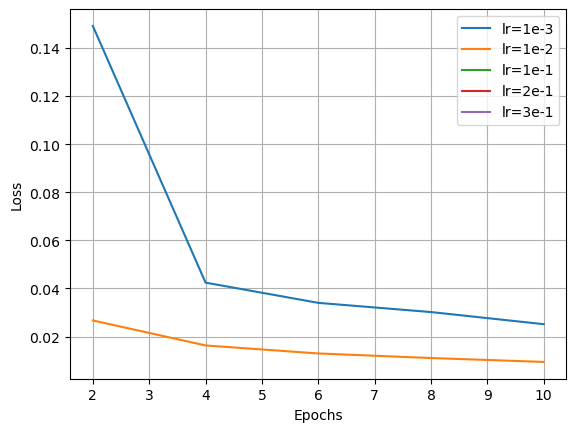

In [ ]:
plt.plot(epo, losses_list1[1], label = 'lr=1e-3', linestyle='-')
plt.plot(epo, losses_list1[2], label = 'lr=1e-2', linestyle='-')
plt.plot(epo, losses_list1[3], label = 'lr=1e-1', linestyle='-')
plt.plot(epo, losses_list1[4], label = 'lr=2e-1', linestyle='-')
plt.plot(epo, losses_list1[5], label = 'lr=3e-1', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

In [ ]:
index_x = ["2","4","6","8", "10"]
index_y = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
df1 = pd.DataFrame(losses_list1, columns=index_x, index = index_y)
df1.index.name = "lr"
df1.to_csv("./results/Table2_relu.csv", index=True)
df1

,2,4,6,8,10
lr,,,,,
0.00001,0.761090,0.301470,0.256487,0.239162,0.226230
0.00100,0.149160,0.042419,0.034004,0.030178,0.025137
0.01000,0.026694,0.016300,0.012959,0.011067,0.009446
0.10000,NaN,NaN,NaN,NaN,NaN
0.20000,NaN,NaN,NaN,NaN,NaN
0.30000,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Loss')

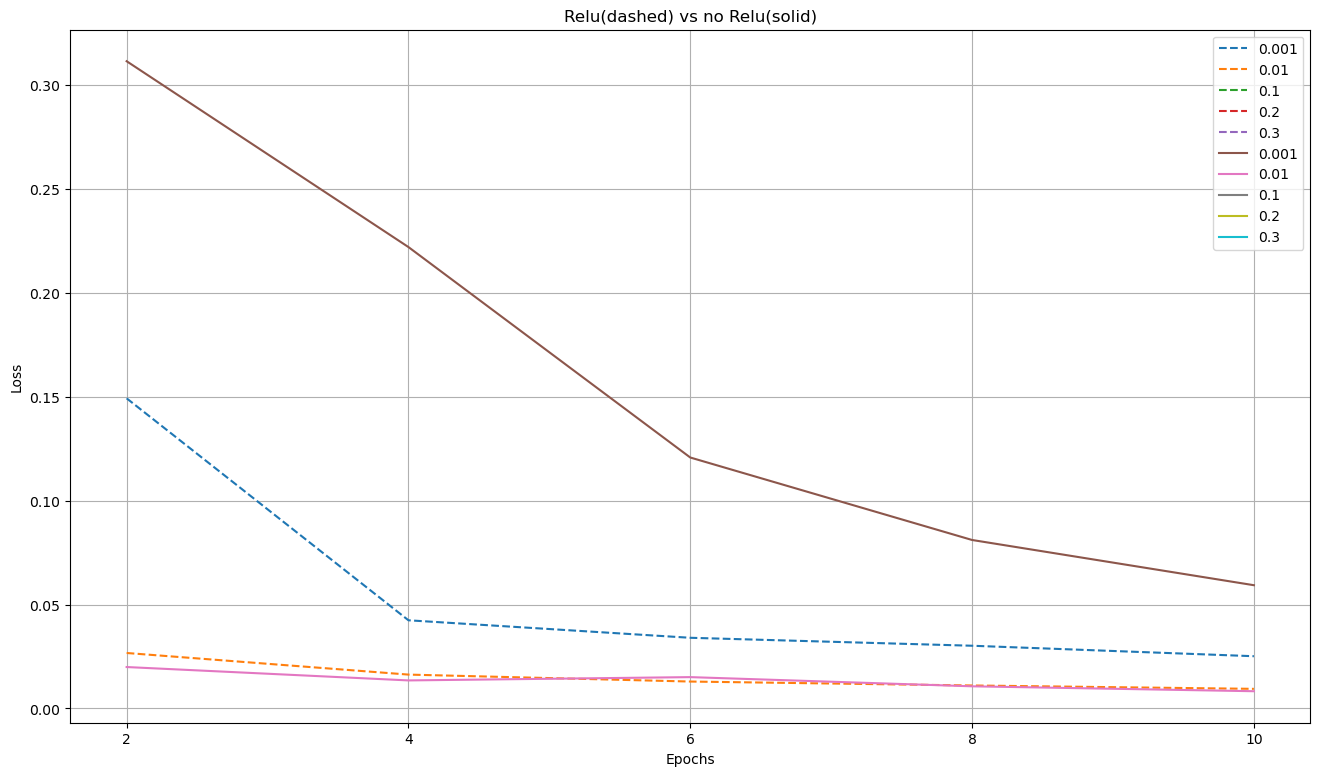

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df1.iloc[1:,:].iterrows():
    ax.plot(df1.columns, row, label=index, linestyle='--')

for index, row in table1.iloc[1:,:].iterrows():
    ax.plot(table1.columns, row, label = index, linestyle='-')
plt.title("Relu(dashed) vs no Relu(solid)")
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [7]:
lr_list = [1e-4]
losses_list=[]
table3 = pd.DataFrame()
path = './volume_inversion_net.pth'
dim = 126 # this needs be the size of Lambda_h
num_layers = 10
model = opnet.OperatorNet(dim, num_layers, scalar_output=True)
loss_f = torch.nn.MSELoss()

In [8]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test",epochs=100))

In [9]:
epo = np.arange(0,10,100)+10

In [10]:
index_x = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
index_y = [1e-4]
table3 = pd.DataFrame(losses_list, columns=index_x, index = index_y)
table3.index.name = "lr"
table3.to_csv("./results/Table2_100.csv", index=True)
table3

,10,20,30,40,50,60,70,80,90,100
lr,,,,,,,,,,
0.0001,0.419232,0.354692,0.306897,0.26269,0.21474,0.159432,0.113461,0.092179,0.077496,0.06584


In [11]:
path = './volume_inversion_net_relu.pth'
dim = 126
num_layers = 5
model = opnet.OperatorNet(dim, num_layers, scalar_output=True, useReLU=True)
loss_f = torch.nn.MSELoss()
df1 = pd.DataFrame()
losses_list1=[]

In [12]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list1.append(train_test_volume.train_test(model=model, loss_f=loss_f,lr=lr, name="test_relu",epochs=100))

In [13]:
index_x = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
index_y = [1e-4]
df2 = pd.DataFrame(losses_list1, columns=index_x, index = index_y)
df2.index.name = "lr"
df2.to_csv("./results/Table2_relu_100.csv", index=True)
df2

,10,20,30,40,50,60,70,80,90,100
lr,,,,,,,,,,
0.0001,0.091141,0.065524,0.054492,0.047798,0.043224,0.039643,0.036668,0.034143,0.03192,0.029993


Text(0, 0.5, 'Loss')

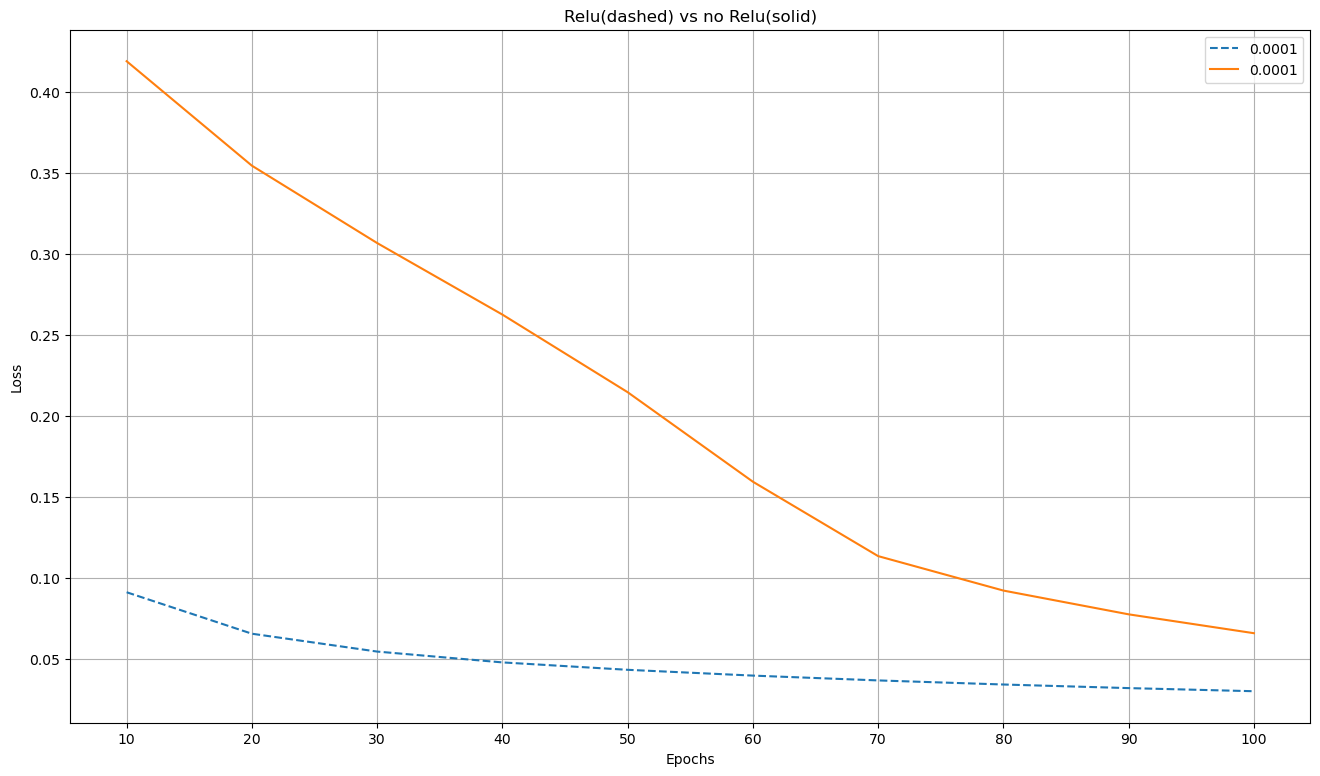

In [17]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df2.iloc[0:,:].iterrows():
    ax.plot(df2.columns, row, label=index, linestyle='--')

for index, row in table3.iloc[0:,:].iterrows():
    ax.plot(table3.columns, row, label = index, linestyle='-')
plt.title("Relu(dashed) vs no Relu(solid)")
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")